In [1]:
from startup import np, pd, plt, sns, so, Path

In [2]:
plot_dir = Path.home() / 'Work' / 'Projects'/ 'priv-obsidian-vault' / 'Work' / 'img'

# Convoluted Users
A common KPI is daily number of users.  This post looks at a model of daily user count broken down into the new user acquisition rate
and the user retention.
We can model the total daily users $u(t)$ as the convolution of a survival function $S(t)$ with a
random variable $r(t)$ representing the number of new users per day, i.e.

$
u(t) = \int_{0}^{t} r(t-s) S(s) ds
$

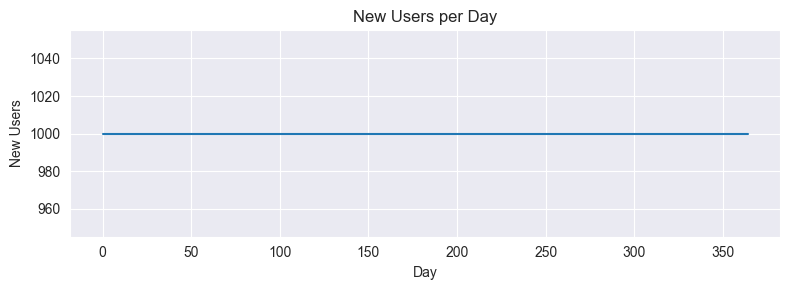

In [3]:
n_days = 365
t = np.arange(0, n_days)
new_user_acquisition_rate_users_per_day = 1000
x = np.ones(n_days)*new_user_acquisition_rate_users_per_day
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(t, x)
ax.set_title('New Users per Day')
ax.set_xlabel('Day')
ax.set_ylabel('New Users')
plt.tight_layout()
fig.savefig(plot_dir / '20251112_00_convolution_new_users.png', dpi=300)


In [4]:
class ConvolutionPlotter:
    def __init__(self, t, x, survival_function):
        self.t = t
        self.x = x
        self.survival_function = survival_function

    @property
    def user_count(self):
        return np.array(
            [
                np.convolve(self.x, s, mode='full') for s in self.survival_function.T
            ]
        ).T

    @property
    def mean_age(self):
        return np.where(
            self.user_count != 0,
                np.array(
                [
                    np.convolve(self.x, s*self.t[:len(s)], mode='full') for s in self.survival_function.T
                ]
            ).T / self.user_count,
            0
        )

    def plot_new_users(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.plot(self.t, self.x)
        ax.set_title('New Users per Day')
        ax.set_xlabel('Day')
        ax.set_ylabel('New Users')
        return ax

    def plot_survival_function(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.plot(self.survival_function)
        ax.set_title('Survival Function')
        ax.set_xlabel('Age')
        ax.set_ylabel('Probability of Survival')
        return ax

    def plot_user_count(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)

        ax.plot(self.t, self.user_count[:len(self.t), :])
        ax.set_title('Daily User Count')
        ax.set_xlabel('Day')
        ax.set_ylabel('Total Users')
        return ax

    def plot_mean_age(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.plot(self.t, self.mean_age[:len(self.t), :])
        ax.set_title('Mean Age')
        ax.set_xlabel('Day')
        ax.set_ylabel('Mean Age')
        return ax

    def plot_all(self):
        fig, axs = plt.subplots(1, 4, figsize=(10, 3))
        ax_n = self.plot_new_users(axs[0])
        ax_s = self.plot_survival_function(axs[1])
        ax_u = self.plot_user_count(axs[2])
        ax_a = self.plot_mean_age(axs[3])
        plt.tight_layout()
        return fig, ax_s, ax_u

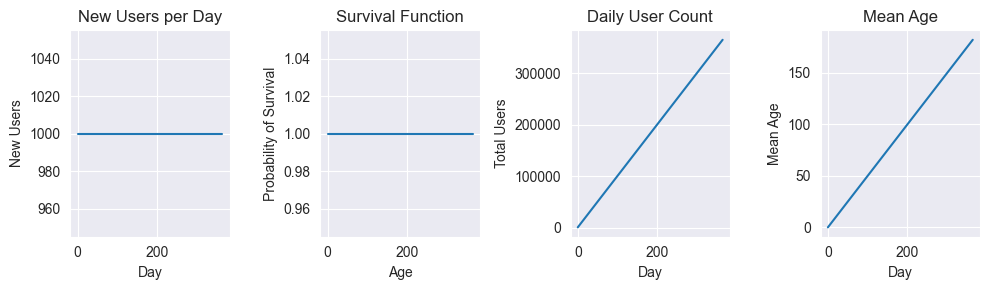

In [5]:
no_churn_survival_function = np.ones((n_days, 1))
plotter = ConvolutionPlotter(t, x, no_churn_survival_function)
fig, ax_s, ax_u = plotter.plot_all()
ax_u.legend = ['No Churn']

fig.savefig(plot_dir / '20251112_01_convolution_no_churn.png', dpi=300)

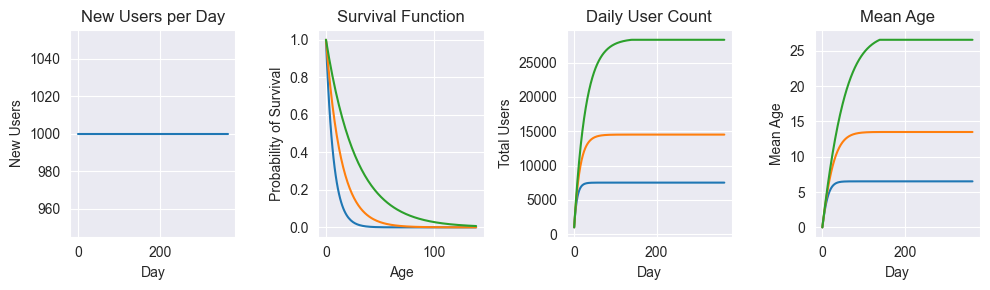

In [6]:
lifetimes = np.array([7, 14, 28])
exponential_churn_survival_function = np.exp(-t[:np.max(lifetimes)*5, np.newaxis]/lifetimes)
fig, ax_s, ax_u = ConvolutionPlotter(t, x, exponential_churn_survival_function).plot_all()
fig.savefig(plot_dir / '20251112_02_convolution_exponential_churn.png', dpi=300)


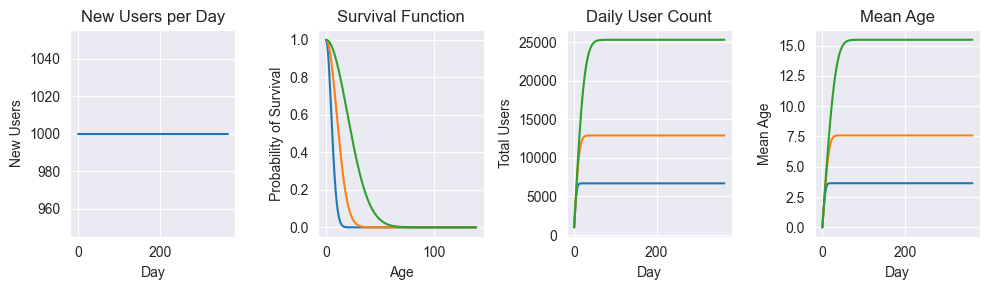

In [7]:
lifetimes = np.array([7, 14, 28])
weibull_churn_survival_function = np.exp(-(t[:np.max(lifetimes)*5, np.newaxis]/lifetimes)**2)
fig, ax_s, ax_u = ConvolutionPlotter(t, x, weibull_churn_survival_function).plot_all()
fig.savefig(plot_dir / '20251112_02_convolution_weibull_churn.png', dpi=300)

/var/folders/b8/svt9dx110s13hpxdqm0n3hl00000gn/T/ipykernel_68900/173530907.py:19: RuntimeWarning: invalid value encountered in divide
  np.array(


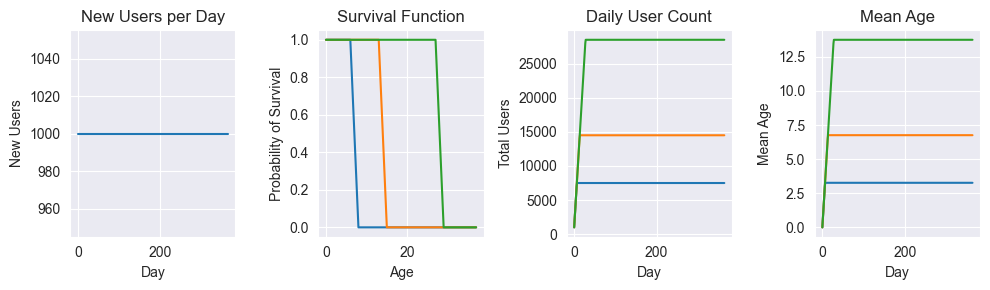

In [8]:
lifetimes = np.array([7, 14, 28])
square_churn_survival_function = np.heaviside(lifetimes-t[:np.max(lifetimes+10), np.newaxis], 0.5)
fig, ax_s, ax_u = ConvolutionPlotter(t, x, square_churn_survival_function).plot_all()
fig.savefig(plot_dir / '20251112_03_convolution_square_churn.png', dpi=300)

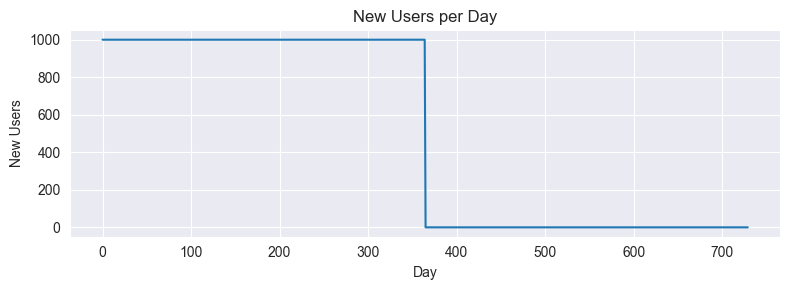

In [9]:
lifetimes = np.array([7, 14, 28])
t_long = np.arange(0, 2 * len(t))
x_long = np.concatenate(
    [np.ones(len(t)) * new_user_acquisition_rate_users_per_day, np.zeros(len(t))]
)
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(t_long, x_long)
ax.set_title('New Users per Day')
ax.set_xlabel('Day')
ax.set_ylabel('New Users')
plt.tight_layout()
fig.savefig(plot_dir / '20251112_04_convolution_new_users_long.png', dpi=300)

/var/folders/b8/svt9dx110s13hpxdqm0n3hl00000gn/T/ipykernel_68900/173530907.py:19: RuntimeWarning: invalid value encountered in divide
  np.array(


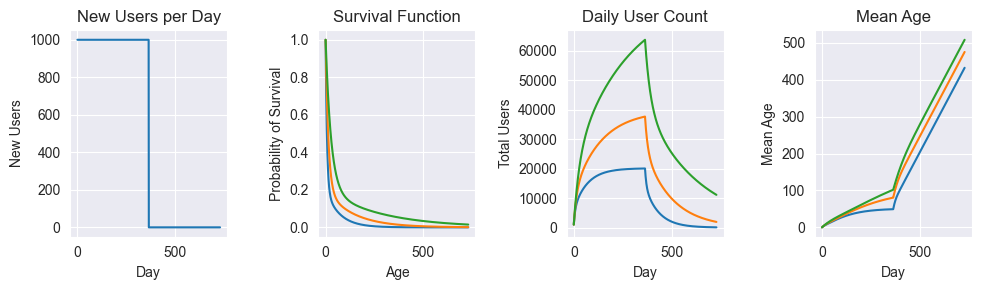

In [10]:
exponential_churn_cure_survival_function = (
        0.8 * np.exp(-t_long[:, np.newaxis] / lifetimes) + 0.20* np.exp(-t_long[:, np.newaxis] / (lifetimes * 10))
)
fig, ax_s, ax_u = ConvolutionPlotter(t_long, x_long, exponential_churn_cure_survival_function).plot_all()
fig.savefig(plot_dir / '20251112_05_convolution_exponential_cure_churn.png', dpi=300)
